In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Les données de l'incidence de la varicelle sont disponibles du site Web du [Réseau Sentinelles](http://www.sentiweb.fr/). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet.

Maintenant, je vais tester si un fichier local existe déjà avant de telecharger les donnés pour eviter d'avoir des donnés répétées. Si le fichier n'existe pas, je le telecharge.

In [3]:
from pathlib import Path

path_to_file = 'incidence-PAY-7.csv'
path = Path(path_to_file)

if path.is_file():
    print(f'The file {path_to_file} exists')
else:
    print(f'The file {path_to_file} does not exist')
    import requests


url = 'http://www.sentiweb.fr/datasets/incidence-PAY-7.csv'
r = requests.get(url, allow_redirects=True)

open('incidence-PAY-7.csv', 'wb').write(r.content)

The file incidence-PAY-7.csv exists


72398

In [5]:
data = "incidence-PAY-7.csv"

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

In [13]:
raw_data = pd.read_csv(data, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202220          7  25273    19093   31453      38          29   
1     202219          7  18674    14220   23128      28          21   
2     202218          7  17851    13963   21739      27          21   
3     202217          7  20314    16001   24627      31          24   
4     202216          7  19660    14860   24460      30          23   
5     202215          7  17799    13715   21883      27          21   
6     202214          7  17005    13162   20848      26          20   
7     202213          7  15448    11659   19237      23          17   
8     202212          7  14702    10794   18610      22          16   
9     202211          7  11729     8347   15111      18          13   
10    202210          7  13314    10036   16592      20          15   
11    202209          7  10485     7600   13370      16          12   
12    202208          7  12088     8741   15435      18          13   
13    202207          7  14003    10789   17217      21          16   
14    202206          7   9798     7048   12548      15          11   
15    202205          7  10851     7797   13905      16          11   
16    202204          7   9547     6721   12373      14          10   
17    202203          7  13972    10680   17264      21          16   
18    202202          7   8495     6026   10964      13           9   
19    202201          7  13793    10597   16989      21          16   
20    202152          7  13239     9611   16867      20          15   
21    202151          7  13326     9629   17023      20          14   
22    202150          7  14128    10312   17944      21          15   
23    202149          7  13674    10369   16979      21          16   
24    202148          7  11549     8503   14595      17          12   
25    202147          7  11419     8376   14462      17          12   
26    202146          7   8216     5724   10708      12           8   
27    202145          7   8965     6468   11462      14          10   
28    202144          7   8736     5636   11836      13           8   
29    202143          7   8145     5164   11126      12           7   
...      ...        ...    ...      ...     ...     ...         ...   
1612  199126          7  17608    11304   23912      31          20   
1613  199125          7  16169    10700   21638      28          18   
1614  199124          7  16171    10071   22271      28          17   
1615  199123          7  11947     7671   16223      21          13   
1616  199122          7  15452     9953   20951      27          17   
1617  199121          7  14903     8975   20831      26          16   
1618  199120          7  19053    12742   25364      34          23   
1619  199119          7  16739    11246   22232      29          19   
1620  199118          7  21385    13882   28888      38          25   
1621  199117          7  13462     8877   18047      24          16   
1622  199116          7  14857    10068   19646      26          18   
1623  199115          7  13975     9781   18169      25          18   
1624  199114          7  12265     7684   16846      22          14   
1625  199113          7   9567     6041   13093      17          11   
1626  199112          7  10864     7331   14397      19          13   
1627  199111          7  15574    11184   19964      27          19   
1628  199110          7  16643    11372   21914      29          20   
1629  199109          7  13741     8780   18702      24          15   
1630  199108          7  13289     8813   17765      23          15   
1631  199107          7  12337     8077   16597      22          15   
1632  199106          7  10877     7013   14741      19          12   
1633  199105          7  10442     6544   14340      18          11   
1634  199104          7   7913     4563   11263      14           8   
1635  199103          7  15387    10484   20290      27          18   
1636  199102          7  16277  

Y a-t-il des points manquants dans ce jeux de données ? 

In [14]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Il n'a pas de point manquant dans ce jeux de données.

Nos données utilisent une convention inhabituelle: le numéro de
semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.
  
Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de
semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous
écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [16]:
data = raw_data.dropna().copy()
data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202220          7  25273    19093   31453      38          29   
1     202219          7  18674    14220   23128      28          21   
2     202218          7  17851    13963   21739      27          21   
3     202217          7  20314    16001   24627      31          24   
4     202216          7  19660    14860   24460      30          23   
5     202215          7  17799    13715   21883      27          21   
6     202214          7  17005    13162   20848      26          20   
7     202213          7  15448    11659   19237      23          17   
8     202212          7  14702    10794   18610      22          16   
9     202211          7  11729     8347   15111      18          13   
10    202210          7  13314    10036   16592      20          15   
11    202209          7  10485     7600   13370      16          12   
12    202208          7  12088     8741   15435      18          13   
13    202207          7  14003    10789   17217      21          16   
14    202206          7   9798     7048   12548      15          11   
15    202205          7  10851     7797   13905      16          11   
16    202204          7   9547     6721   12373      14          10   
17    202203          7  13972    10680   17264      21          16   
18    202202          7   8495     6026   10964      13           9   
19    202201          7  13793    10597   16989      21          16   
20    202152          7  13239     9611   16867      20          15   
21    202151          7  13326     9629   17023      20          14   
22    202150          7  14128    10312   17944      21          15   
23    202149          7  13674    10369   16979      21          16   
24    202148          7  11549     8503   14595      17          12   
25    202147          7  11419     8376   14462      17          12   
26    202146          7   8216     5724   10708      12           8   
27    202145          7   8965     6468   11462      14          10   
28    202144          7   8736     5636   11836      13           8   
29    202143          7   8145     5164   11126      12           7   
...      ...        ...    ...      ...     ...     ...         ...   
1612  199126          7  17608    11304   23912      31          20   
1613  199125          7  16169    10700   21638      28          18   
1614  199124          7  16171    10071   22271      28          17   
1615  199123          7  11947     7671   16223      21          13   
1616  199122          7  15452     9953   20951      27          17   
1617  199121          7  14903     8975   20831      26          16   
1618  199120          7  19053    12742   25364      34          23   
1619  199119          7  16739    11246   22232      29          19   
1620  199118          7  21385    13882   28888      38          25   
1621  199117          7  13462     8877   18047      24          16   
1622  199116          7  14857    10068   19646      26          18   
1623  199115          7  13975     9781   18169      25          18   
1624  199114          7  12265     7684   16846      22          14   
1625  199113          7   9567     6041   13093      17          11   
1626  199112          7  10864     7331   14397      19          13   
1627  199111          7  15574    11184   19964      27          19   
1628  199110          7  16643    11372   21914      29          20   
1629  199109          7  13741     8780   18702      24          15   
1630  199108          7  13289     8813   17765      23          15   
1631  199107          7  12337     8077   16597      22          15   
1632  199106          7  10877     7013   14741      19          12   
1633  199105          7  10442     6544   14340      18          11   
1634  199104          7   7913     4563   11263      14           8   
1635  199103          7  15387    10484   20290      27          18   
1636  199102          7  16277  

In [18]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans
le sens chronologique.

In [21]:
sorted_data = data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et le début de la période qui suit, la différence temporelle doit être zéro, ou au moins très faible. Nous laissons une "marge d'erreur" d'une seconde.

Ceci s'avère tout à fait juste sauf pour deux périodes consécutives entre lesquelles il manque une semaine.

Nous reconnaissons ces dates: c'est la semaine sans observations que nous avions supprimées !

In [23]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Un premier regard sur les données !

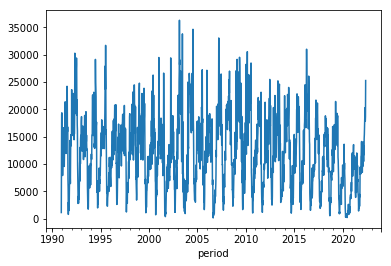

In [26]:
sorted_data['inc'].plot()

Un zoom sur les dernières années montre mieux la situation des pics en hiver.

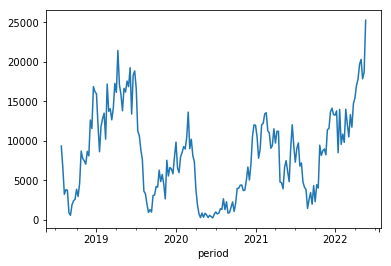

In [28]:
sorted_data['inc'][-200:].plot()

nous définissons la période de référence du 1er septembre de l'année  𝑁  au 1er septembre de l'année  𝑁+1 .

Notre tâche est un peu compliquée par le fait que l'année ne comporte pas un nombre entier de semaines. Nous modifions donc un peu nos périodes de référence: à la place du 1er septembre de chaque année, nous utilisons le premier jour de la semaine qui contient le 1er septembre.


Encore un petit détail: les données commencent a la fin de 1990, ce qui rend la première année incomplète. Nous commençons donc l'analyse en 1991.

In [33]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er septembre, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [35]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles.

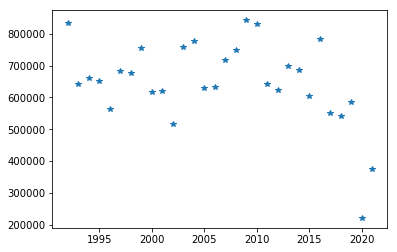

In [37]:
yearly_incidence.plot(style='*')

Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).

In [39]:
yearly_incidence.sort_values()

2020    221186
2021    376290
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

Enfin, un histogramme 

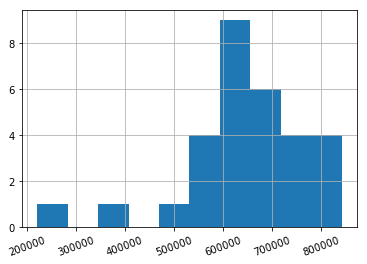

In [40]:
yearly_incidence.hist(xrot=20)